### Notebook for annotating the 6mpi cardiac MoMacs using `GPT-4`

#### Environment: Scanpy

- **Developed by**: Alexandra Cirnu
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 240324
- **Last modified**: 240502

##### Load required modules

In [35]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
from scipy.sparse import csr_matrix
import muon as mu
from muon import atac as ac
from muon import prot as pt

In [36]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=100)
%matplotlib inline

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.2.0
asttokens           NA
colorama            0.4.6
comm                0.2.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.1
decorator           5.1.1
exceptiongroup      1.2.0
executing           2.0.1
h5py                3.10.0
igraph              0.11.4
ipykernel           6.29.2
ipywidgets          8.1.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
llvmlite            0.42.0
matplotlib          3.8.3
matplotlib_inline   0.1.6
mpl_toolkits        NA
mudata              0.2.3
muon                0.1.5
natsort             8.4.0
numba               0.59.0
numpy               1.26.4
packaging           23.2
pandas              2.2.1
parso               0.8.3
patsy               0.5.6
pickleshare         0.7.5
platformdirs        4.2.0
prompt_toolkit      3.0.42
psutil              5.9.8
pure_eva

In [37]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

##### Load in dataset that was clustered with `leiden`

In [38]:
input = '/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_leiden_clustering_muon_ac240502.raw.h5mu'
mdata = mu.read_h5mu(input)
mdata

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 34482 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	34482 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      uns:	'C_scANVI_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      obsp:	'connectivities', 'distances'
    prot:	34482 x 99
      obs:	'library', 'batch'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [39]:
adata = mdata.mod["rna"]
adata

AnnData object with n_obs × n_vars = 34482 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    uns: 'C_scANVI_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [40]:
X_is_raw(adata)  

True

In [41]:
adata.obs

,cell_source,donor,n_counts,sample,seed_labels,condition,genotype,infection,library,model,...,percent_mt,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,DOCK4+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.346667,0.000000,0.0,-0.019995,-0.083225,6,1,reference,DOCK4+MØ,3
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.043320,0.025940,0.0,-0.169221,-0.390143,6,4,reference,Monocytes,3
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Monocytes,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.027315,0.051323,0.0,-0.317631,-0.578955,7,4,reference,Monocytes,4
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.023282,0.014110,0.0,-0.370103,-0.370084,7,2,reference,LYVE1+MØ,2
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,LYVE1+MØ,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,...,0.016323,0.040006,0.0,-0.142503,-0.357287,7,2,reference,LYVE1+MØ,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTTAGTA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,4226.0,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,Ttn,...,0.000710,0.141978,0.0,-0.373712,-0.402608,25,7,query,Neutrophils,5
TTTGTTGCAAGCTCTA-1-B2,AG_Gerull,Ttn_Ctr_noninf_1,3733.0,Ttn_Ctr_noninf_1,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.017412,0.000000,0.0,-0.179842,-0.495021,23,7,query,DOCK4+MØ,3
TTTGTTGGTACAGGTG-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,24293.0,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,Ttn,...,0.037254,0.000000,13.0,-0.435458,-0.744327,21,7,query,MØ_general,1
TTTGTTGTCCCAGGAC-1-B2,AG_Gerull,Ttn_Ctr_noninf_2,6388.0,Ttn_Ctr_noninf_2,Unknown,Ttn_Ctr_noninf,Ttn_Ctr,noninf,B2,Ttn,...,0.023168,0.140889,0.0,0.080642,-0.877899,24,7,query,MØ_general,1


In [42]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
print(X_data_df)

Shape of counts DataFrame: (34482, 29378)
                       Xkr4  Gm1992  Gm19938  Gm37381  Rp1  Sox17  Gm37587  \
AAACGCTGTTGTGTTG-1-A1     0       0        0        0    0      0        0   
AAACGCTTCTCGCTCA-1-A1     0       0        0        0    0      0        0   
AAAGGTACAGAACATA-1-A1     0       0        0        0    0      0        0   
AAAGTCCAGGGACACT-1-A1     0       0        0        0    0      0        0   
AAAGTCCCAGTAGGAC-1-A1     0       0        0        0    0      0        0   
...                     ...     ...      ...      ...  ...    ...      ...   
TTTGTTGAGGTTAGTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGCAAGCTCTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGGTACAGGTG-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCCAGGAC-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCGGGACT-1-B2     0       0        0        0    0      0        0   

                     

In [43]:
adata_raw = adata.copy()

#### Normalize and logarithmize data 

In [44]:
sc.pp.normalize_total(adata, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Mapkapk2', 'Il1b', 'Fabp5', 'Fabp4', 'S100a8', 'S100a9', 'Prdx1', 'Cxcl2', 'Spp1', 'Myl2', 'Actb', 'Igkc', 'Apoe', 'Ftl1', 'Hbb-bt', 'Hbb-bs', 'Camp', 'Ngp', 'Slc16a10', 'Lyz2', 'Hba-a1', 'Hba-a2', 'Ccl8', 'Ccl3', 'Ccl4', 'Ctla2a', 'Cma1', 'Mcpt4', 'Retnla', 'Retnlg', 'Cmss1', 'Gm26917', 'Gm42418', 'Cd74', 'Malat1', 'Fth1', 'Tmsb4x']
    finished (0:00:00)


In [45]:
X_data = adata.X.copy()
X_data_sparse = csr_matrix(X_data)
X_data_df = pd.DataFrame.sparse.from_spmatrix(X_data_sparse, index=adata.obs.index, columns=adata.var.index)
print("Shape of counts DataFrame:", X_data_df.shape)
print(X_data_df)

Shape of counts DataFrame: (34482, 29378)
                       Xkr4  Gm1992  Gm19938  Gm37381  Rp1  Sox17  Gm37587  \
AAACGCTGTTGTGTTG-1-A1     0       0        0        0    0      0        0   
AAACGCTTCTCGCTCA-1-A1     0       0        0        0    0      0        0   
AAAGGTACAGAACATA-1-A1     0       0        0        0    0      0        0   
AAAGTCCAGGGACACT-1-A1     0       0        0        0    0      0        0   
AAAGTCCCAGTAGGAC-1-A1     0       0        0        0    0      0        0   
...                     ...     ...      ...      ...  ...    ...      ...   
TTTGTTGAGGTTAGTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGCAAGCTCTA-1-B2     0       0        0        0    0      0        0   
TTTGTTGGTACAGGTG-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCCAGGAC-1-B2     0       0        0        0    0      0        0   
TTTGTTGTCCGGGACT-1-B2     0       0        0        0    0      0        0   

                     

### Clustering the neighborhood graph

/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


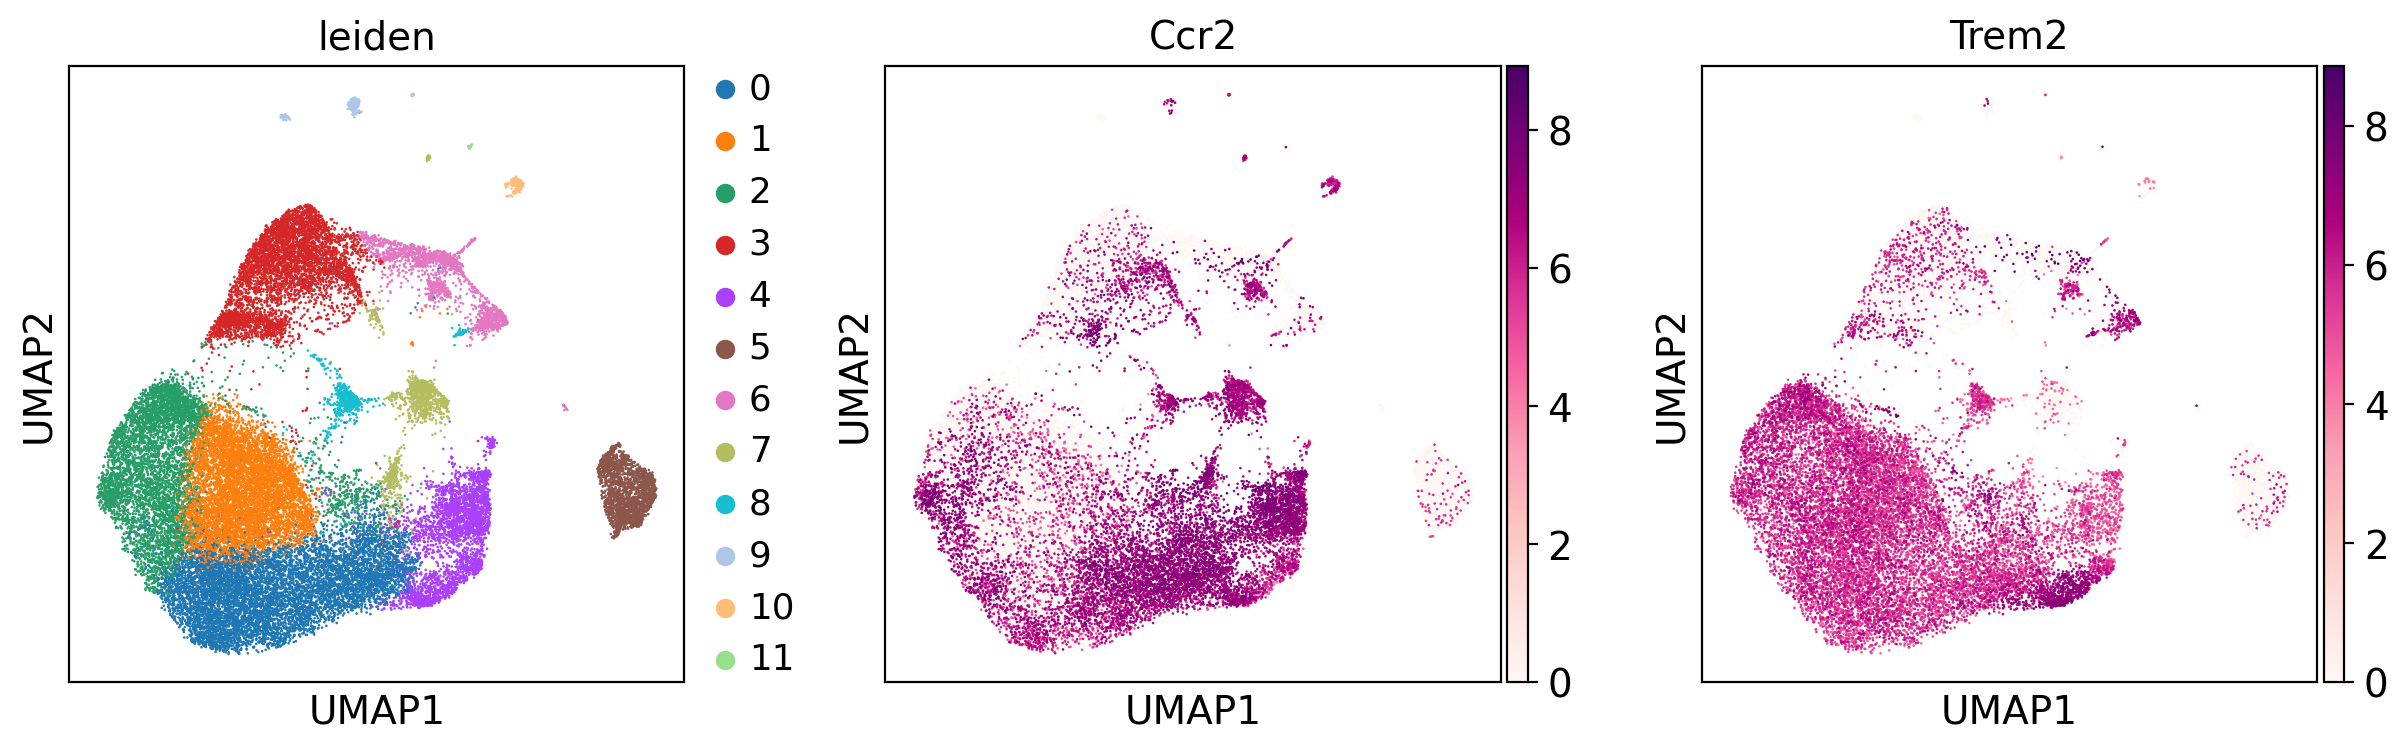

In [46]:
sc.pl.umap(adata, color=["leiden", "Ccr2", "Trem2"], color_map='RdPu')

### Finding marker genes

In [47]:
sc.settings.verbosity = 2

ranking genes


/home/acirnu/miniforge3/envs/Scanpy/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished (0:00:42)


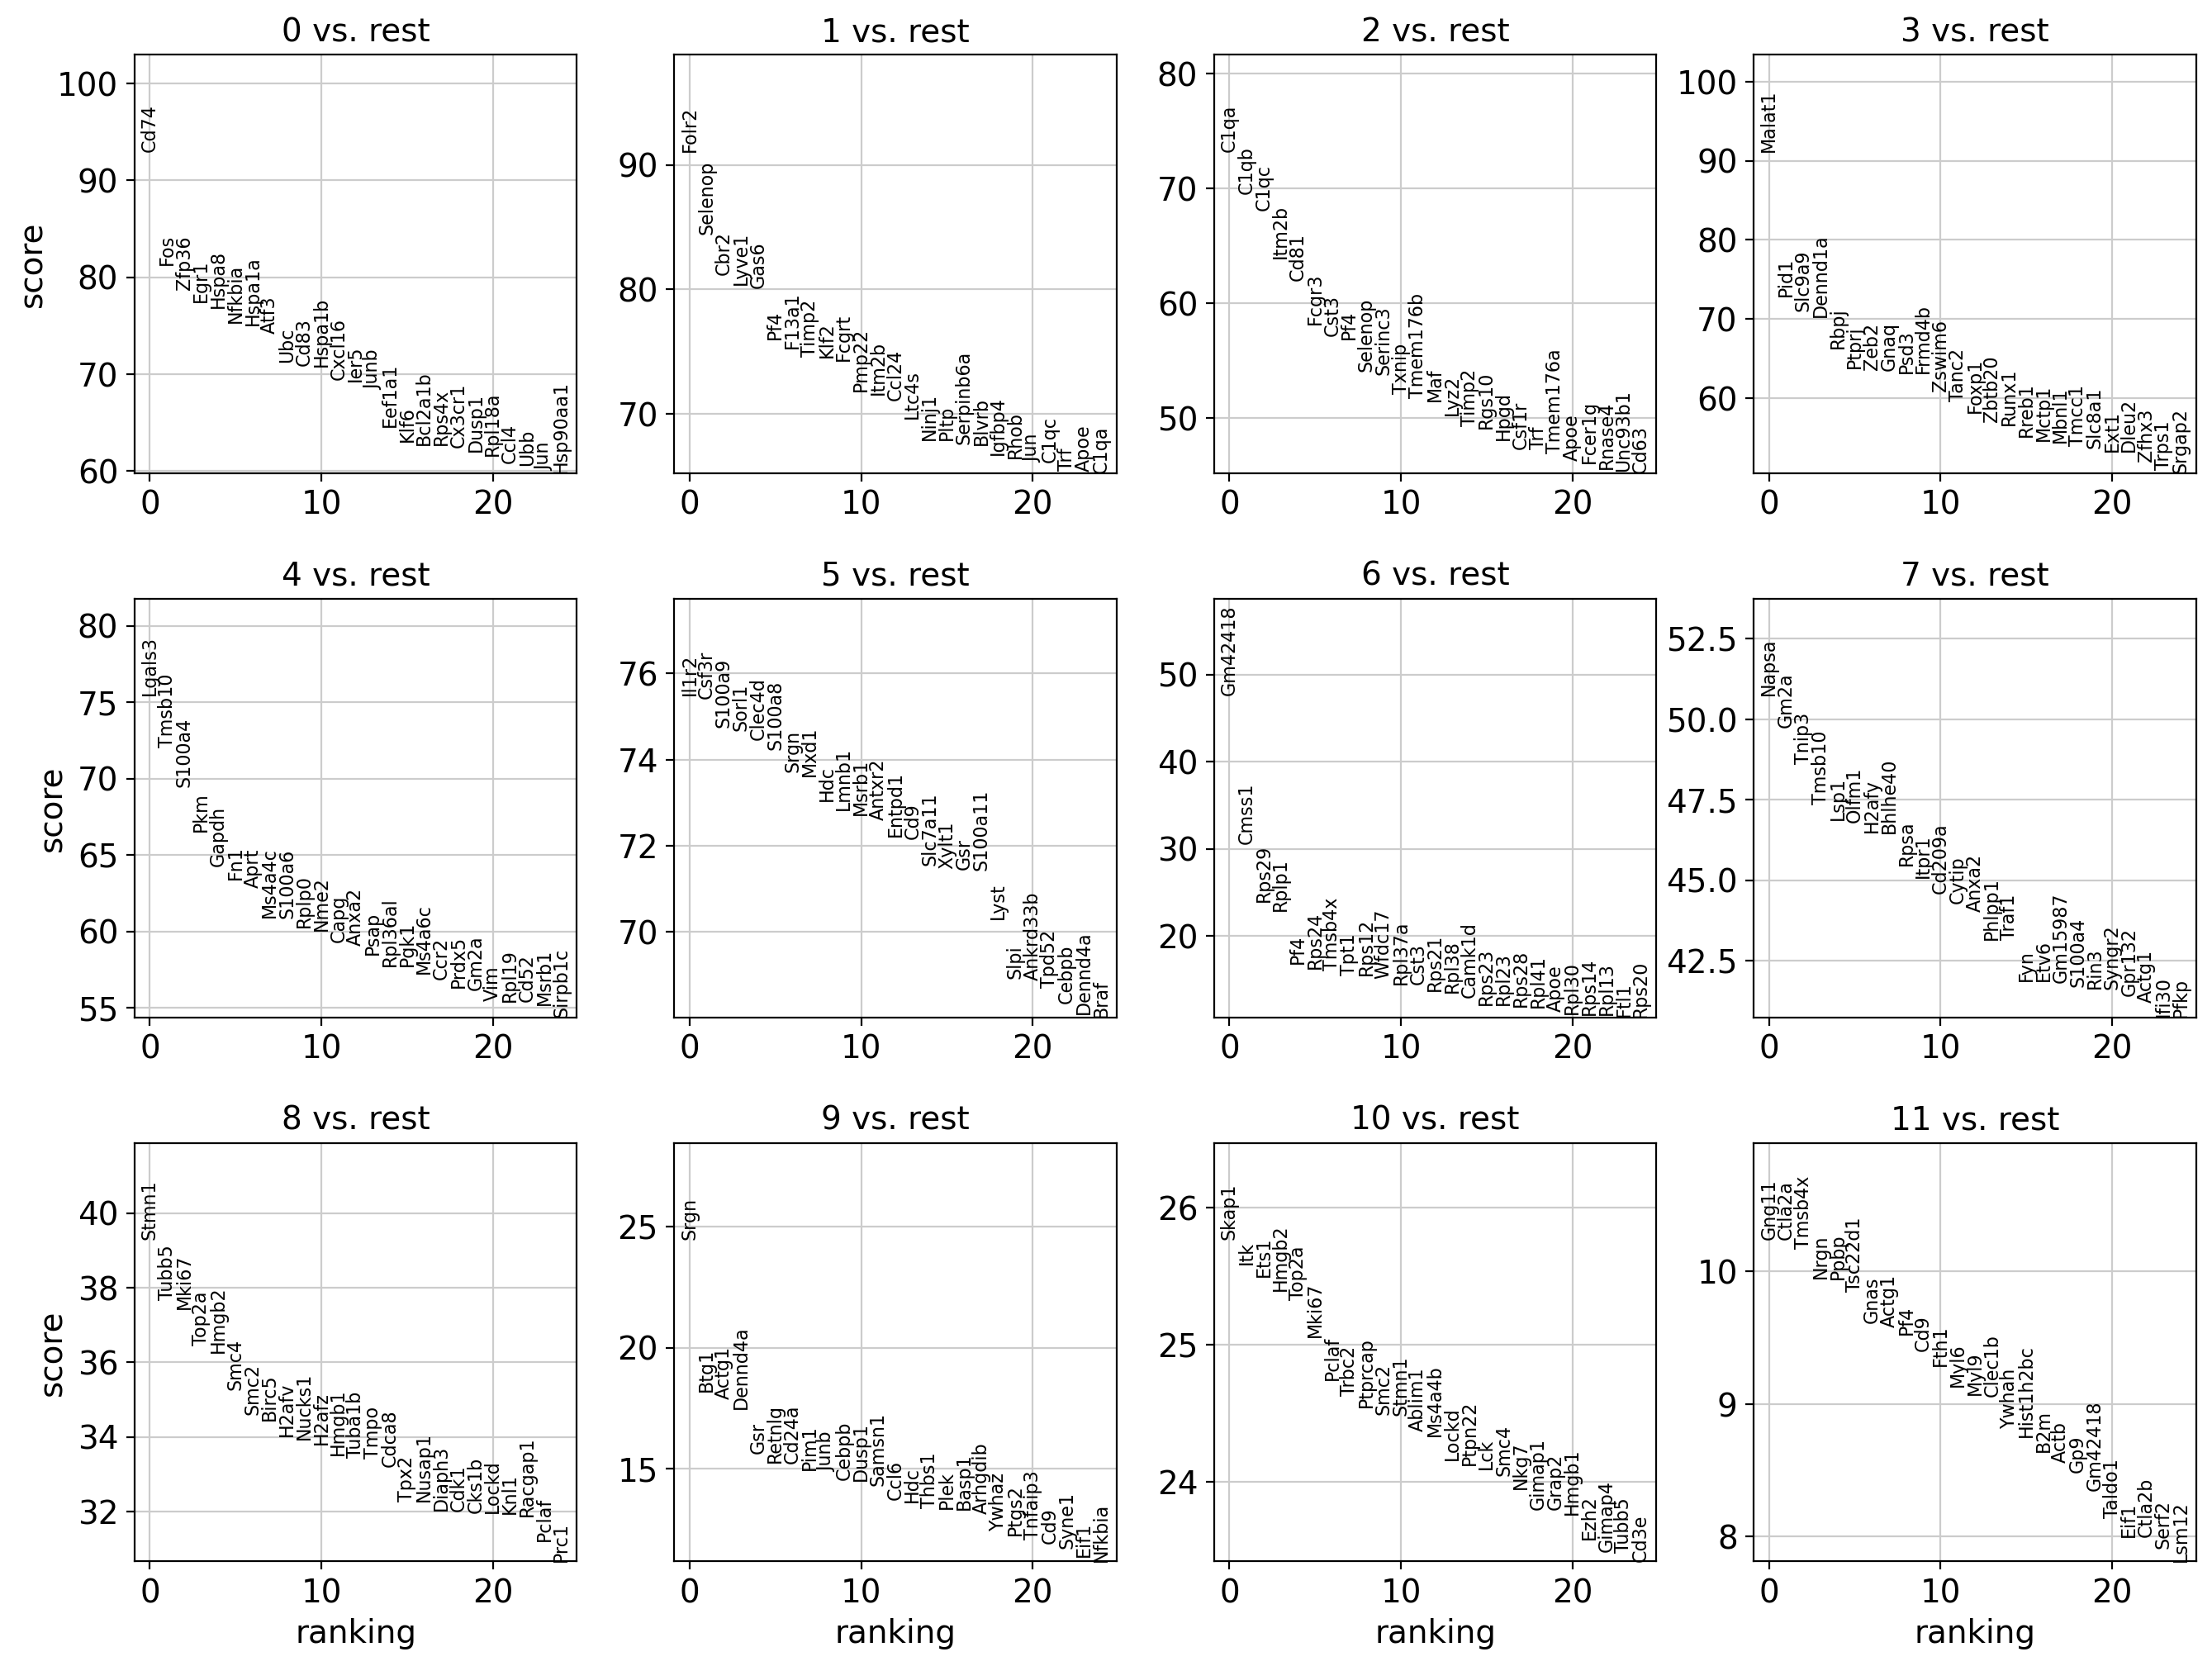

In [48]:
sc.tl.rank_genes_groups(adata, "leiden", method="wilcoxon", n_genes= 100)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [49]:
#Show the top 10 ranked genes per cluster
pd.DataFrame(adata.uns["rank_genes_groups"]["names"]).head(10).T   

,0,1,2,3,4,5,6,7,8,9
0,Cd74,Fos,Zfp36,Egr1,Hspa8,Nfkbia,Hspa1a,Atf3,Ubc,Cd83
1,Folr2,Selenop,Cbr2,Lyve1,Gas6,Pf4,F13a1,Timp2,Klf2,Fcgrt
2,C1qa,C1qb,C1qc,Itm2b,Cd81,Fcgr3,Cst3,Pf4,Selenop,Serinc3
3,Malat1,Pid1,Slc9a9,Dennd1a,Rbpj,Ptprj,Zeb2,Gnaq,Psd3,Frmd4b
4,Lgals3,Tmsb10,S100a4,Pkm,Gapdh,Fn1,Aprt,Ms4a4c,S100a6,Rplp0
5,Il1r2,Csf3r,S100a9,Sorl1,Clec4d,S100a8,Srgn,Mxd1,Hdc,Lmnb1
6,Gm42418,Cmss1,Rps29,Rplp1,Pf4,Rps24,Tmsb4x,Tpt1,Rps12,Wfdc17
7,Napsa,Gm2a,Tnip3,Tmsb10,Lsp1,Olfm1,H2afy,Bhlhe40,Rpsa,Itpr1
8,Stmn1,Tubb5,Mki67,Top2a,Hmgb2,Smc4,Smc2,Birc5,H2afv,Nucks1
9,Srgn,Btg1,Actg1,Dennd4a,Gsr,Retnlg,Cd24a,Pim1,Junb,Cebpb


In [50]:
# Initialize an empty list to store arrays for vertical stacking
out = []
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names

# Iterate over each group
for group in groups:
    # Stack arrays vertically and append to the 'out' list
    out.append(np.vstack((
        result['names'][group],
        result['scores'][group],
        result['pvals_adj'][group],
        result['logfoldchanges'][group],
        np.array([group] * len(result['names'][group])).astype('object')
    )).T)

# Vertically stack all arrays in the 'out' list
out = np.vstack(out)

#Create a data frame
markers = pd.DataFrame(out, columns= ['Gene', 'Score', 'Adj_pvalue', 'Logfoldchange', 'Cluster'])

markers.shape

(1200, 5)

In [51]:
markers_filtered = markers[(markers.Adj_pvalue < 0.05) & (abs(markers.Logfoldchange) > 1)]
markers_filtered.shape

(1101, 5)

Write a .csv table for the filtered markers 

In [52]:
markers_filtered.to_csv('/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_ac240502.csv')

In [ ]:
#To see the marker genes for each cluster vary the number in markers_filtered.Cluster

markers_0 = markers_filtered[markers_filtered.Cluster == '0']
markers_0.head(10)

### Prompt the top genes for each cluster to `GPT-4` (whole .csv file)

**User**
1. Identify the immune cell type subpopulations of murine heart cells using the markers in the 'Gene' column of the uploaded csv file and assign it to each cluster from the 'Cluster' column. Only provide the cell type name. Some can be a mixture of multiple cell types. Consider that the cells can be only myeloid cells. 
2. Can you be more specific on the clusters you were able to assign? For example can you identify tissue-resident macrophages or pro-inflammatory monocytes?
3. Can you also define other subpopulations?

**ChatGPT**

- Cluster 0: Macrophages, Tissue-Resident Macrophages
- Cluster 1: Monocytes
- Cluster 2: Macrophages, Tissue-Resident Macrophages
- Cluster 3: Undetermined
- Cluster 4: M1 Macrophages, Pro-Inflammatory Monocytes
- Cluster 5: M1 Macrophages, Pro-Inflammatory Monocytes
- Cluster 6: M1 Macrophages, Neutrophils
- Cluster 7: Undetermined
- Cluster 8: Dendritic Cells, Pro-Inflammatory Monocytes
- Cluster 9: Monocytes, Pro-Inflammatory Monocytes
- Cluster 10: Macrophages
- Clusters 11, 12, 13, 14, 15, 16, 17: Undetermined

- Markers for tissue-resident macrophages: Timd4, Vsig4, and Cd163
- Markers for pro-inflammatory macrophages: Nos2, Tnf, Il1b
- Markers for anti-inflammaotry macrophages: Arg1, Il10, Mrc1 (CD206)
- Markers for conventional DCs: Itgax (CD11c); cDC1 = H2-Aa (MHC II); cDC2 = Cd172a (SIRPa)
- Markers for pDCs: Siglech, Bst2, hich expr. of Il3ra (CD123)
- Markers for classical monocytes: high Ly6c expression
- Markers for non-classical monocytes: Cx3cr1, low Ly6c expression+
- Markers for pro-inflammatory monocytes: higher expression of Ccr2 and Ly6c2

### Visualize the top 3 markers for each cluster

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sc.pl.dotplot(adata, var_names=["Folr2", "Selenop", "Cbr2", "Hspa1a", "Hspa1b", "Jun", "C1qa", "C1qb", "C1qc", "Malat1", "Pid1", "Dennd1a", "Ccr2", "Eef1a1", "Rplp0", "Tmsb10", "S100a4", "Pkm", 
                                 "Il1r2", "Csf3r", "S100a9", "Gm42418", "Cmss1", "Rps29", "Napsa", "Cd209a", "H2afy", "Stmn1", "Tubb5", "Tuba1b", "Srgn", "Btg1", "Actg1", "Itk", "Skap1", "Ets1", 
                                 "Gng11", "Ctla2a", "Tmsb4x"], groupby="leiden", ax=ax, dendrogram = True, cmap= "magma")
plt.show()

In [ ]:
sc.pl.umap(adata, color= ['leiden', "Folr2", "Selenop", "Cbr2", "Hspa1a", "Hspa1b", "Jun", "C1qa", "C1qb", "C1qc", "Malat1", "Pid1", "Dennd1a", "Ccr2", "Eef1a1", "Rplp0", "Tmsb10", "S100a4", 
                          "Pkm", "Il1r2", "Csf3r", "S100a9", "Gm42418", "Cmss1", "Rps29", "Napsa", "Cd209a", "H2afy", "Stmn1", "Tubb5", "Tuba1b", "Srgn", "Btg1", "Actg1", "Itk", "Skap1", 
                          "Ets1", "Gng11", "Ctla2a", "Tmsb4x", 'leiden'], legend_loc="right margin", frameon=False, color_map="RdPu")

In [ ]:
sc.pl.umap(adata, color= ['leiden', 'C_scANVI', 'Timd4'], legend_loc="right margin", frameon=False, color_map="RdPu")

#### Add `leiden` information to the C_scANVI seed label

In [ ]:
adata.obs['classification'] = adata.obs['C_scANVI'].astype(str) + '_' + adata.obs['leiden'].astype(str)
adata.obs

In [ ]:
sc.settings.set_figure_params(dpi=300)
sc.pl.umap(adata, color= ['classification'], legend_loc="right margin", legend_fontsize= 5 , frameon=False, color_map="RdPu", ncols=1, size = 2)

In [ ]:
adata.obs["classification"].cat.categories

In [ ]:
highlight_DC = ['DC_0', 'DC_1', 'DC_2', 'DC_3', 'DC_4', 'DC_5', 'DC_6', 'DC_7', 'DC_8','DC_9', 'DC_10', 'DC_11']
highlight_DOCK4MØ = ['DOCK4+MØ_0', 'DOCK4+MØ_1', 'DOCK4+MØ_2', 'DOCK4+MØ_3', 'DOCK4+MØ_4', 'DOCK4+MØ_5', 'DOCK4+MØ_6', 'DOCK4+MØ_7','DOCK4+MØ_8', 'DOCK4+MØ_10', 'DOCK4+MØ_11']
highlight_LYVE1MØ = ['LYVE1+MØ_0', 'LYVE1+MØ_1', 'LYVE1+MØ_2', 'LYVE1+MØ_3', 'LYVE1+MØ_4', 'LYVE1+MØ_5', 'LYVE1+MØ_7','LYVE1+MØ_8', 'LYVE1+MØ_9', 'LYVE1+MØ_10', 'LYVE1+MØ_11']
highlight_Mast = ['Mast_7','Mast_10']
highlight_Monocytes = ['Monocytes_0', 'Monocytes_1', 'Monocytes_2', 'Monocytes_3','Monocytes_4', 'Monocytes_5', 'Monocytes_6', 'Monocytes_7','Monocytes_8', 'Monocytes_9', 'Monocytes_10', 'Monocytes_12']
highlight_MØ_general = ['MØ_general_0', 'MØ_general_1', 'MØ_general_2', 'MØ_general_3','MØ_general_4', 'MØ_general_5', 'MØ_general_7', 'MØ_general_8','MØ_general_9']
highlight_Neutrophils = ['Neutrophils_0', 'Neutrophils_4', 'Neutrophils_6','Neutrophils_7'] 

In [ ]:
groups = [
    ('classification', highlight_DC),
    ('classification', highlight_DOCK4MØ),
    ('classification', highlight_LYVE1MØ),
    ('classification', highlight_Mast),
    ('classification', highlight_Monocytes),
    ('classification', highlight_MØ_general),
    ('classification', highlight_Neutrophils),
    ('C_scANVI', None)  # This one does not use 'groups' so we pass None
]

# Setup the subplot grid
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

for ax, (color, group) in zip(axs.flat, groups):
    if group is not None:
        sc.pl.umap(adata, color=color, groups=group,
                   legend_loc='right margin', legend_fontsize=5, frameon=False, show=False, ax=ax)
    else:
        sc.pl.umap(adata, color=color,
                   legend_loc='right margin', legend_fontsize=5, frameon=False, show=False, ax=ax)

    ax.set_title(color)  # Optionally set title to distinguish each subplot

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

#### Save AnnData object

In [ ]:
adata_export = anndata.AnnData(X = adata_raw.X, var = adata.var, obs = adata.obs, obsm = adata.obsm, obsp = adata.obsp, uns = adata.uns) 
X_is_raw(adata_export)

In [ ]:
adata_export

#### Update the mdata object

In [ ]:
mdata.mod['rna'] = adata_export
mdata

In [ ]:
rna_cells_export = set(mdata.mod['rna'].obs_names)
mask = mdata.mod['prot'].obs_names.isin(rna_cells_export)
filtered_prot_export = mdata.mod['prot'][mask]
mdata = mu.MuData({"rna": mdata.mod['rna'], "prot": filtered_prot_export})
mdata

In [ ]:
mdata.write('/home/acirnu/data/ACM_cardiac_leuco/5_Leiden_clustering_and_annotation/ACM_myeloids_clustered_muon_ac240502.raw.h5mu')